In [1]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [2]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [3]:
def bodeplot_set(fig_ax, *args):
    
    #　ゲイン線図のグリッドとy軸ラベルの設定
    fig_ax[0].grid(which='both', ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')
    
    # 位相線図のグリッドとx軸、y軸ラベルの設定
    fig_ax[1].grid(which='both', ls=':')
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    #凡例の表示
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

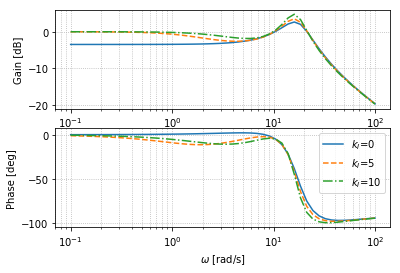

In [5]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

g = 9.81  # 重力加速度[m/s^2]
l = 0.2     # アームの長さ[m]
M = 0.5    # アームの質量[kg]
mu = 1.5e-2   # 粘性摩擦係数[kg*m^2/s]
J = 1.0e-2    # 慣性モーメント[kg*m^2]

P = tf([0, 1], [J, mu, M*g*l])

kp = 2
kd = 0.1
ki = (0, 5, 10)

LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)

for i in range(3):
    K = tf([kd, kp, ki[i]], [1, 0]) # PID制御
    Gyr = feedback(P*K,1) # 閉ループ系
    gain, phase, w = bode(Gyr, logspace(-1,2), Plot=False)
    
    pltargs = {'ls': next(LS), 'label': '$k_I$='+str(ki[i])}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)

bodeplot_set(ax, 'best')
    
    